In [1]:
from dolfin import *
import matplotlib.pyplot as plt
from numpy.polynomial.legendre import leggauss
import numpy as np
from ufl import tanh
import solver3D as s3
import matrix2D as m2
import upwind as up

Missing HsMG for fract norm computing


/home/saragazzoni/miniconda3/envs/myfenics/lib/python3.11/site-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()


In [2]:
mesh = IntervalMesh(20, 0, 1)

In [3]:
m0 = 1e-3
dt = 0.5
T = 400
save_interval = 10
times = []#[0,7/dt,14/dt,21/dt,28/dt]
doses = []#10*np.ones_like(times)
V = FunctionSpace(mesh,"P",1)
n0 = Expression("m0/(pow(2*pi,0.5)*sigma)*exp(-pow(s-s0,2)/(2*sigma*sigma))",m0 = m0,s0 = 0.5,s=0,sigma=sqrt(0.02),degree=2)
# n0 = interpolate(n0,V)
c0 = interpolate(Constant(1.0), V)
path_sol = "solutions/test1D_ds0.005_dt0.5_T400"

solver = s3.Solver3D(mesh, V, n0, c0, dt, T, save_interval, times, doses, path_sol)
# solver.set_parameters({'K_m':0.005})
mass = solver.solve()

time=0: 
Solving linear variational problem.
iter=1: norm=7.86342e-06
time=0.5: 
iter=1: norm=0.00172766
iter=2: norm=3.30526e-06
Solving linear variational problem.
Solving linear variational problem.
time=1: 
iter=1: norm=0.00036935
Solving linear variational problem.
time=1.5: 
iter=1: norm=0.000462468
Solving linear variational problem.
time=2: 
iter=1: norm=0.000576788
Solving linear variational problem.
time=2.5: 
iter=1: norm=0.000717211
Solving linear variational problem.
time=3: 
iter=1: norm=0.000888681
Solving linear variational problem.
time=3.5: 
iter=1: norm=0.00109674
iter=2: norm=7.05534e-06
Solving linear variational problem.
Solving linear variational problem.
time=4: 
iter=1: norm=0.00134051
iter=2: norm=1.06067e-05
Solving linear variational problem.
Solving linear variational problem.
time=4.5: 
iter=1: norm=0.00163708
iter=2: norm=1.59127e-05
Solving linear variational problem.
Solving linear variational problem.
time=5: 
iter=1: norm=0.00198835
iter=2: norm=2.369

Text(0, 0.5, 'mass')

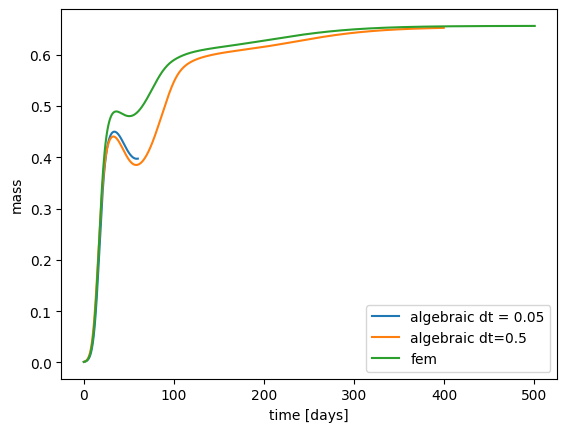

In [35]:
mass = np.load('solutions/test1D_ds0.005_dt0.05/mass.npy')
time1 = np.arange(0,60,0.05)
plt.plot(time1,mass)
mass2 = np.load('solutions/test1D_ds0.005_dt0.5_T400/mass.npy')
time2 = np.arange(0,400,0.5)
plt.plot(time2,mass2)
mass3 = np.load('../Model1D/solutions/B_Km1e-2/mass.npy')
time3 = np.arange(0,501,0.5)
plt.plot(time3,mass3)
plt.legend(['algebraic dt = 0.05','algebraic dt=0.5', 'fem'])
plt.xlabel('time [days]')
plt.ylabel('mass')

0.23646951340101044 0.300996642768811 0.4634805604255207


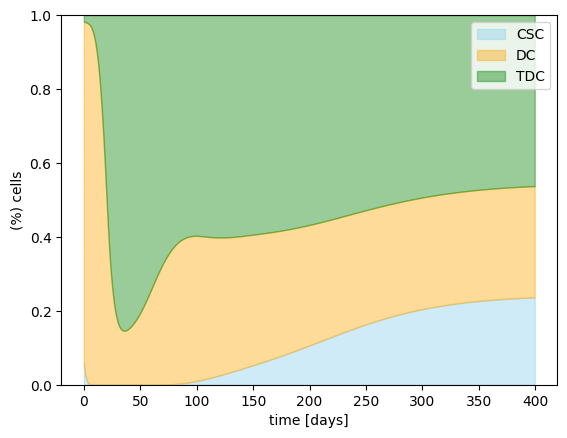

In [32]:
path_sol = 'solutions/t400_masses'
csc = np.load(path_sol +  '/csc_mass.npy')
dc = np.load(path_sol + '/dc_mass.npy')
tdc = np.load(path_sol + '/tdc_mass.npy')
#plt.plot(time01,csc)
#plt.plot(time01,csc+dc)
print(csc[-1],dc[-1],tdc[-1])
# print(mass2)

time=np.arange(0,400,0.5)
plt.fill_between(time, csc, color='skyblue', alpha=0.4)
plt.fill_between(time, csc+dc, csc, where=(csc+dc > csc), color='orange', alpha=0.4)
plt.fill_between(time, 1, csc+dc, where=(1 > csc+dc), color='green', alpha=0.4)
plt.ylim([0,1])
#plt.xlim([0,150])
plt.ylabel('(%) cells')
plt.xlabel('time [days]')
plt.legend(['CSC','DC','TDC'])

## 2D

In [1]:
from dolfin import *
import matplotlib.pyplot as plt
import numpy as np
import matrix2D as m2

Missing HsMG for fract norm computing


/home/saragazzoni/miniconda3/envs/myfenics/lib/python3.11/site-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()


In [2]:
mesh2D = UnitSquareMesh(20,20)

In [3]:
m0 = 1e-3
dt = 0.5
T = 400
save_interval = 2
times = []#[0,7/dt,14/dt,21/dt,28/dt]
doses = []#10*np.ones_like(times)
V2D = FunctionSpace(mesh2D,"P",2)
n0 = Expression("m0/(pow(2*pi,0.5)*sigma)*exp(-pow(s-s0,2)/(2*sigma*sigma))",m0 = m0,s0 = 0.5,s=0,sigma=sqrt(0.02),degree=2)
# n0 = interpolate(n0,V)
c0 = interpolate(Constant(1.0), V2D)
path_sol = "solutions/test2D_ds0.005_dt0.5_T400"

solver = m2.MatrixSolver(mesh2D, V2D, n0, c0, dt, T, save_interval, times, doses, path_sol)
# solver.set_parameters({'K_m':0.005})
x = solver.solve()

time=0: 
Calling FFC just-in-time (JIT) compiler, this may take some time.
Solving linear variational problem.
iter=1: norm=7.86915e-06
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
LGMRES converged [iter= 1, time=2.83s, res=7.2e-08]
time=0.5: 
Solving linear variational problem.
iter=1: norm=0.00172892
Solving linear variational problem.
iter=2: norm=3.30728e-06
LGMRES converged [iter= 1, time=2.77s, res=8.4e-08]
time=1: 
Solving linear variational problem.
iter=1: norm=0.000369622
LGMRES converged [iter= 1, time=2.70s, res=1.0e-07]
time=1.5: 
Solving linear variational problem.
iter=1: norm=0.000462811
LGMRES converged [iter= 1, time=2.73s, res=1.2e-07]
time=2: 
Solving linear variational problem.
iter=1: norm=0.00057722
LGMRES converged [iter= 1, time=6.48s, res=1.5e-0

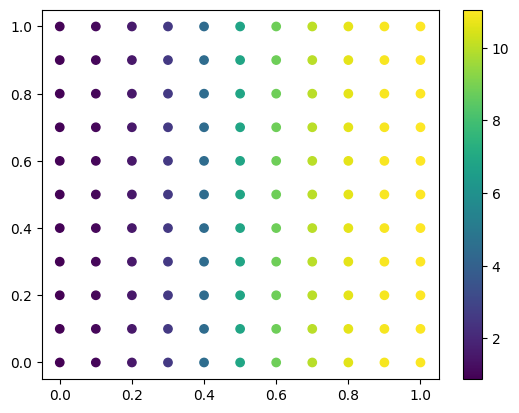

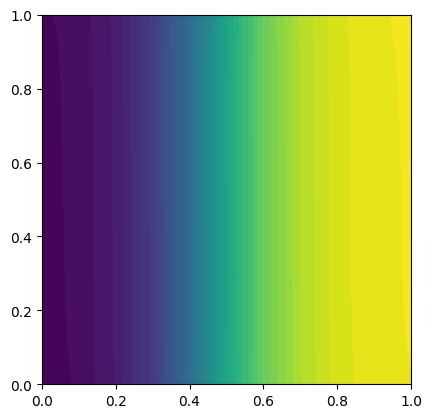

[ 0.87464     1.02846544  1.51180667  2.57090754  4.48559968  6.89216963
  8.79304575  9.97074903 10.61265084 10.91498473 10.99185833  0.89856292
  1.04095921  1.52485058  2.57110903  4.45054379  6.85468109  8.79136516
  9.98231759 10.62384362 10.92425299 11.00896637  0.90793064  1.04748418
  1.52932379  2.56970085  4.43907152  6.84274784  8.79091525  9.98834819
 10.63061422 10.93051757 11.01643986  0.91229052  1.05103253  1.53182248
  2.57035755  4.43744975  6.84108875  8.79246244  9.99204407 10.63452091
 10.934042   11.01998817  0.91491767  1.05347266  1.53411117  2.57268561
  4.43996356  6.84344356  8.79506582  9.99476154 10.63689311 10.93598007
 11.02176359  0.9170266   1.0556073   1.53650697  2.57581179  4.44400412
  6.84721453  8.79808075  9.99708786 10.63859656 10.93722967 11.0228473
  0.91915419  1.05778435  1.53896642  2.57901638  4.44811747  6.85102838
  8.80107738  9.99935283 10.64024095 10.93844689 11.02392851  0.92183334
  1.06034405  1.5414318   2.58158454  4.45087419  6.

In [31]:
mesh2D = UnitSquareMesh(10,10)
V2D = FunctionSpace(mesh2D,"P",1)
f2D = Function(V2D)

vec = x[-1]
# xnew = [vec[i] for i in dof_to_vertex_map(V2D)]
f2D.vector()[:] = vec
sol = plt.scatter(mesh2D.coordinates()[:,0],mesh2D.coordinates()[:,1],c=f2D.compute_vertex_values())
plt.colorbar(sol)
plt.show()
plot(f2D)
plt.show()
print(f2D.compute_vertex_values())

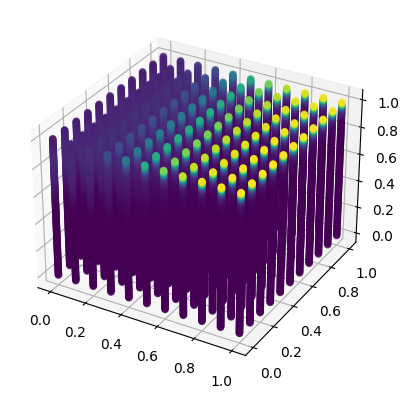

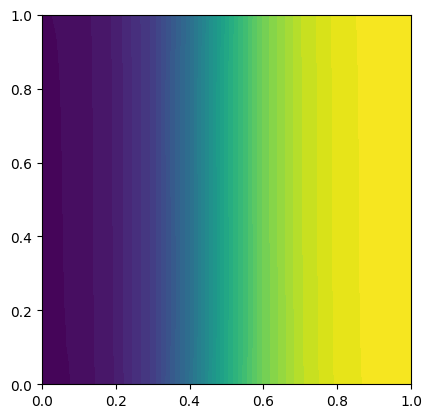

[110  99 111  88 100 112  77  89 101 113  66  78  90 102 114  55  67  79
  91 103 115  44  56  68  80  92 104 116  33  45  57  69  81  93 105 117
  22  34  46  58  70  82  94 106 118  11  23  35  47  59  71  83  95 107
 119   0  12  24  36  48  60  72  84  96 108 120   1  13  25  37  49  61
  73  85  97 109   2  14  26  38  50  62  74  86  98   3  15  27  39  51
  63  75  87   4  16  28  40  52  64  76   5  17  29  41  53  65   6  18
  30  42  54   7  19  31  43   8  20  32   9  21  10]


In [40]:
mesh3D = UnitCubeMesh(10,10,199)
V3D = FunctionSpace(mesh3D,"P",1)
f3D = Function(V3D)
vec = []
for i in range(200):
    f2D.vector()[:] = x[i]
    vec.append(f2D.compute_vertex_values())


# xnew = [vec[i] for i in dof_to_vertex_map(V2D)]
# f2D.vector()[:] = vec
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(mesh3D.coordinates()[:,0],mesh3D.coordinates()[:,1],mesh3D.coordinates()[:,2],c=vec)
plt.colorbar(sol)
plt.show()
plot(f2D)
plt.show()
print(dof_to_vertex_map(V2D))

Text(0, 0.5, 'mass')

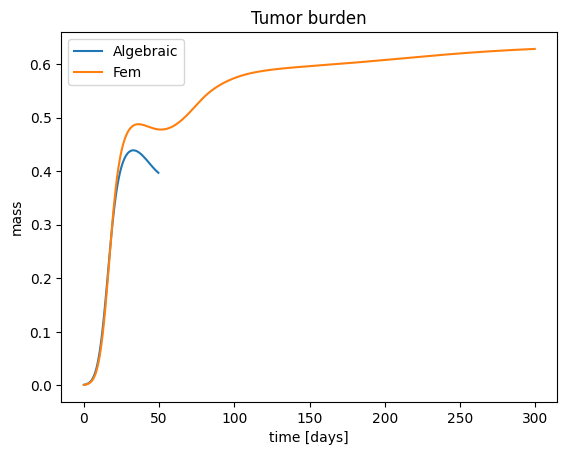

In [5]:
mass = np.load('solutions/test2D/mass.npy')
time = np.arange(0,50,0.5)
plt.plot(time,mass)
mass2 = np.load('../Model2D/solutions/m01e-3_T300_mesh10/mass.npy')
time2 = np.arange(0,300,0.5)
plt.plot(time2,mass2)
# mass3 = np.load('solutions/test2D_Bc/mass.npy')
# time3 = np.arange(0,100,0.5)
# plt.plot(time3,mass3)
# plt.xlim([0,600])
plt.legend(['Algebraic','Fem','3'])
plt.title('Tumor burden')
plt.xlabel('time [days]')
plt.ylabel('mass')

In [ ]:
csc = np.load('solutions/test2D_newmatrix/csc_mass.npy')
dc = np.load('solutions/test2D_newmatrix/dc_mass.npy')
tdc = np.load('solutions/test2D_newmatrix/tdc_mass.npy')
#plt.plot(time01,csc)
#plt.plot(time01,csc+dc)
# print(csc[600],dc[600],tdc[600])
# print(mass[-1])

time=np.arange(0,100,0.5)
plt.fill_between(time, csc, color='skyblue', alpha=0.4)
plt.fill_between(time, csc+dc, csc, where=(csc+dc > csc), color='orange', alpha=0.4)
plt.fill_between(time, 1, csc+dc, where=(1 > csc+dc), color='green', alpha=0.4)
plt.ylim([0,1])
# plt.xlim([0,300])
plt.ylabel('(%) cells')
plt.xlabel('time [days]')
plt.legend(['CSC','DC','TDC'])


In [ ]:
Ns = int(1/0.005)
# vec = []
# for i in range(Ns-1):
#     vec.extend(x[i])
mesh3D = UnitCubeMesh(5,5,5)
V3D = FunctionSpace(mesh3D,"P",1)
# print(mesh3D.coordinates())
x = np.arange(0,mesh3D.coordinates().shape[0])
# print(x)
xnew = [x[i] for i in dof_to_vertex_map(V3D)]
f3D = Function(V3D)
f3D.vector()[:] = xnew
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
sol = ax.scatter(mesh3D.coordinates()[:,0],mesh3D.coordinates()[:,1],mesh3D.coordinates()[:,2],c=f3D.vector()[:])
print(f3D(1,0,0))
plt.colorbar(sol)
# print(vec[:])
# print(max(n_vect))


In [ ]:
mesh2D = UnitSquareMesh(5,5)
V2D = FunctionSpace(mesh2D,"P",1)
f2D = Function(V2D)
print(len(vec))
f2D.vector()[:] = vec[-36:]
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(mesh2D.coordinates()[:,0],mesh2D.coordinates()[:,1],np.ones(mesh2D.coordinates().shape[0]),c=f2D.compute_vertex_values())
ax.scatter(mesh2D.coordinates()[:,0],mesh2D.coordinates()[:,1],np.zeros(mesh2D.coordinates().shape[0]),c=f2D.compute_vertex_values())
# plot(f2D)
plt.show()
plt.colorbar(plot(f2D))

In [ ]:
# Ns = int(1/0.005)
mesh3D = UnitCubeMesh(3,3,3)
V3D = FunctionSpace(mesh3D,"P",1)
# print(mesh3D.coordinates())
x_vec = np.arange(0,mesh3D.coordinates().shape[0])
# print(x)
vec = [x_vec[i] for i in dof_to_vertex_map(V3D)]
f3D = Function(V3D)
f3D.vector()[:] = vec
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ciao = ax.scatter(mesh3D.coordinates()[:,0],mesh3D.coordinates()[:,1],mesh3D.coordinates()[:,2],c=f3D.compute_vertex_values())
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.colorbar(ciao)
print(f3D(0,0,0.3333))
print(f3D(0.33,0,0))
print(f3D(1,0.333,0.333))
print(f3D(0,1,0))
print(f3D(1,1,0))
print(dof_to_vertex_map(V3D))
